In [60]:
from sklearn.linear_model import LinearRegression
import pandas as pd

from sklearn.model_selection import train_test_split

In [61]:
#!pip install tensorflow

In [62]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

from tensorflow.keras.utils import to_categorical


def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("./Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")

y_train = open_labels("./Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("./Kursmaterialien/data/fashion/t10k-images-idx3-ubyte.gz")

y_test = open_labels("./Kursmaterialien/data/fashion/t10k-labels-idx1-ubyte.gz")

#One hot encoding
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(20, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))


model.compile(optimizer="rmsprop",loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train.reshape(60000, 28, 28, 1),
         y_train,
          epochs=20,
          batch_size=1000
         )

Epoch 1/20


C:\Users\roman\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5305 - loss: 55.7759
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8243 - loss: 1.9795
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8660 - loss: 0.5253
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8943 - loss: 0.3043
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9164 - loss: 0.2325
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9279 - loss: 0.1962
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9345 - loss: 0.1794
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9436 - loss: 0.1530
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9468 - loss: 0.1431
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9525 - loss: 0.1295
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9555 - loss: 0.1223
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9605 - 

In [65]:
Conv2D?

In [66]:
model.layers

[<Conv2D name=conv2d_9, built=True>,
 <Flatten name=flatten_6, built=True>,
 <Dense name=dense_22, built=True>]

In [67]:
model.layers[0].weights[0]

<KerasVariable shape=(3, 3, 1, 20), dtype=float32, path=sequential_16/conv2d_9/kernel>

In [68]:
import tensorflow.keras.backend as K

data = K.eval(model.layers[0].weights[0])

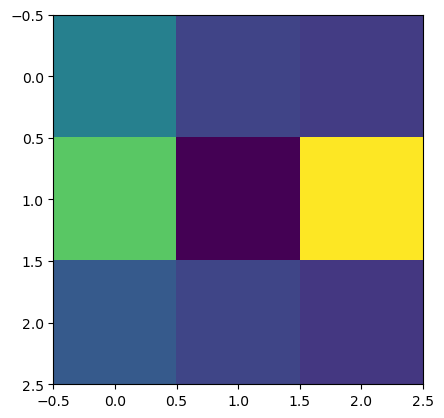

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(data[:,:,:,1].reshape(3,3))
plt.show()
           

## Evaluieren bzw testen des Models

In [12]:
model.evaluate(X_test.reshape(10000,784),  y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7820 - loss: 0.7044


[0.7104579210281372, 0.7785999774932861]

In [13]:
#model.evaluate?

In [14]:
#print(model.metrics_names)

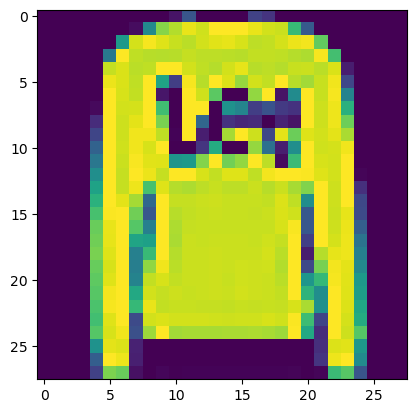

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

test_d = X_test[1]

plt.imshow(test_d)
plt.show()

In [12]:
pred = model.predict(X_test.reshape(-1, 784))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
pred.shape
np.sum(pred[0])

1.0

In [18]:
import numpy as np

np.argmax(pred[1])

2

In [19]:
import pandas as pd

In [22]:
np.argmax(pred, axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [24]:
ytrue = pd.Series(np.argmax(y_test, axis=1), name="actual")
ypred = pd.Series(np.argmax(pred, axis=1), name="pred")
ytrue

0       9
1       2
2       1
3       1
4       6
       ..
9995    9
9996    1
9997    8
9998    1
9999    5
Name: actual, Length: 10000, dtype: int64

In [25]:
pd.crosstab(ytrue, ypred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,770,8,14,95,8,0,84,0,21,0
1,13,917,14,44,10,0,0,0,2,0
2,16,0,662,11,218,0,77,0,15,1
3,39,14,11,833,58,1,39,0,5,0
4,2,2,173,45,722,0,47,0,8,1
5,1,1,0,1,0,804,0,99,11,83
6,217,2,169,52,164,1,363,0,32,0
7,0,0,0,0,0,50,0,867,2,81
8,2,1,17,15,1,4,24,14,920,2
